# Capstone Three Project :  Wine Sale Forecasting

# 1. Importing Libraries

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
#from statsmodels.tsa.stattools import kpss
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
import warnings

# 2. Loading the data

In [73]:
# import data
wine_1 = pd.read_csv('test.csv')

In [74]:
wine_2 = pd.read_csv('train.csv.zip')

# 3. Data Wrangling

In [75]:
# check the first 5 lines of data
wine_1.head() 

,Date,store,product,number_sold
0,2019-01-01,0,0,845
1,2019-01-02,0,0,851
2,2019-01-03,0,0,840
3,2019-01-04,0,0,842
4,2019-01-05,0,0,845


In [76]:
wine_2.head()

,Date,store,product,number_sold
0,2010-01-01,0,0,801
1,2010-01-02,0,0,810
2,2010-01-03,0,0,818
3,2010-01-04,0,0,796
4,2010-01-05,0,0,808


In [77]:
wine=pd.concat([wine_1, wine_2])   ###  wine = pd.merge(wine_test, wine_train, how="outer") 
wine

,Date,store,product,number_sold
0,2019-01-01,0,0,845
1,2019-01-02,0,0,851
2,2019-01-03,0,0,840
3,2019-01-04,0,0,842
4,2019-01-05,0,0,845
...,...,...,...,...
230085,2018-12-27,6,9,890
230086,2018-12-28,6,9,892
230087,2018-12-29,6,9,895
230088,2018-12-30,6,9,899


In [78]:
wine.describe()

,store,product,number_sold
count,255640.000000,255640.000000,255640.000000
mean,3.000000,4.500000,781.838077
std,2.000004,2.872287,204.910291
min,0.000000,0.000000,234.000000
25%,1.000000,2.000000,722.000000
50%,3.000000,4.500000,836.000000
75%,5.000000,7.000000,916.000000
max,6.000000,9.000000,1205.000000


In [79]:
wine = wine.sort_values(by=['Date'], ascending=True)
wine

,Date,store,product,number_sold
23009,2010-01-01,0,7,856
213655,2010-01-01,6,5,907
141341,2010-01-01,4,3,923
78888,2010-01-01,2,4,870
220229,2010-01-01,6,7,887
...,...,...,...,...
4744,2019-12-31,1,2,660
16789,2019-12-31,4,5,949
14234,2019-12-31,3,8,275
19344,2019-12-31,5,2,900


In [80]:
wine.columns

Index(['Date', 'store', 'product', 'number_sold'], dtype='object')

In [81]:
wine = wine[['Date','number_sold']]
wine.head()

,Date,number_sold
23009,2010-01-01,856
213655,2010-01-01,907
141341,2010-01-01,923
78888,2010-01-01,870
220229,2010-01-01,887


In [82]:
wine.rename(columns={'number_sold':'sold', 'Date':'date'}, inplace=True)
wine.head()

/var/folders/6t/3zt4r0xs2gg6kfkqfhtvlm780000gn/T/ipykernel_33671/181497880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine.rename(columns={'number_sold':'sold', 'Date':'date'}, inplace=True)


,date,sold
23009,2010-01-01,856
213655,2010-01-01,907
141341,2010-01-01,923
78888,2010-01-01,870
220229,2010-01-01,887


In [83]:
wine.dtypes

date    object
sold     int64
dtype: object

In [84]:
wine.isnull().sum()

date    0
sold    0
dtype: int64

In [85]:
wine.duplicated().any()

True

In [86]:
wine=wine.drop_duplicates()

In [87]:
wine.duplicated().any()

False

In [88]:
wine=wine.groupby('date')['sold'].sum()
wine

date
2010-01-01    53038
2010-01-02    54223
2010-01-03    48600
2010-01-04    51474
2010-01-05    50709
              ...  
2019-12-27    52963
2019-12-28    52239
2019-12-29    52223
2019-12-30    53845
2019-12-31    51671
Name: sold, Length: 3652, dtype: int64

In [89]:
wine=pd.DataFrame(wine)
wine.head()

,sold
date,
2010-01-01,53038
2010-01-02,54223
2010-01-03,48600
2010-01-04,51474
2010-01-05,50709


In [90]:
wine=wine.reset_index()
wine

,date,sold
0,2010-01-01,53038
1,2010-01-02,54223
2,2010-01-03,48600
3,2010-01-04,51474
4,2010-01-05,50709
...,...,...
3647,2019-12-27,52963
3648,2019-12-28,52239
3649,2019-12-29,52223
3650,2019-12-30,53845


In [91]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    3652 non-null   object
 1   sold    3652 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 57.2+ KB


In [92]:
wine['date']=pd.to_datetime(wine['date'])

In [93]:
wine=wine.set_index('date')
wine.head()

,sold
date,
2010-01-01,53038
2010-01-02,54223
2010-01-03,48600
2010-01-04,51474
2010-01-05,50709


# 4. Exploratory Data Analysis And Visualization

In [96]:
#make a predictor variable y
y = wine['sold']

In [97]:
type(y)

pandas.core.series.Series

<Axes: xlabel='date'>

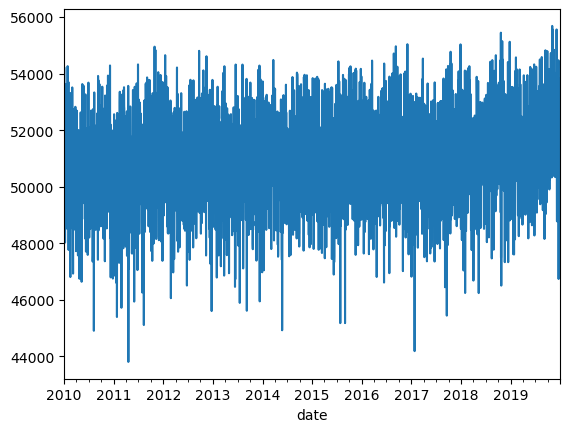

In [99]:
#visualize the data
y.plot()

In [100]:
#Decomposition
decomposition = seasonal_decompose(y)

In [101]:
# Assign three variables
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

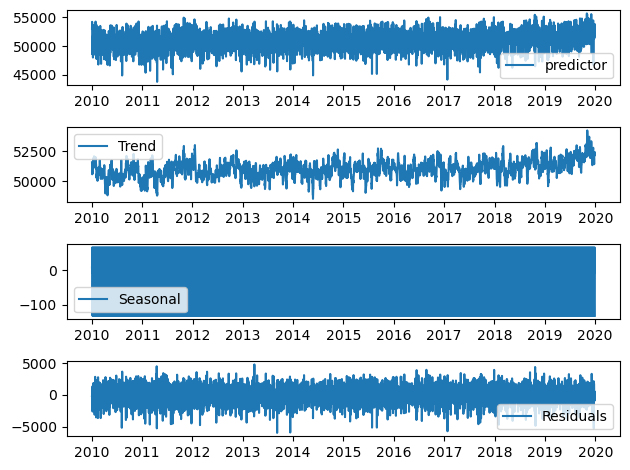

In [104]:
#Plot the original data, the trend, the seasonality, and the residuals 
plt.subplot(411)
plt.plot(y, label = 'predictor')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

# 5. Preprocessing Data

In [ ]:
#testing for stationarity


# 6. Modelling